In [64]:
from matplotlib.patches import Polygon
from scipy.stats import uniform, norm, t
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Continuous Probability Distribution

Continous probability distribution can take on an infinitive number of possible values, corresponding to every value in an interval. Examples:
* Distribution of height of adult Canadian males
* Distribution of time to failure (in thousands of hours) for a type of light bulb

A continous random variable is modelled with a function f(x) calles <strong>probability density function</strong> (pdf). f(x) represents the height of the curve at point x. For continuous random variables, probabilities are <strong>area under the curve</strong> (AUC).

The probability of a specific value is 0. -> P(X = a) = 0, for any a. 

![alt text](https://archive.cnx.org/resources/45235fbb0150597fb915992c8fc830ff961f8b31/CNX_Stats_C05_M02_001.jpg "Probability Density Function")

Continuous Probability distributions must satisfy:
1. $ 0 \leq p(x) \leq 1 $ for all x
2. $ \sum_{all x} p(x)= 1$ 

The <strong>cumulative distribution function</strong> (cdf) F(x) answers the question what is the probability x to be less that a specific value, e.g. P(X < 2.7)

The <strong>mean</strong> ($ \mu $ or E(X)) is calculated as follows:
$$ E(X) = \int_{-\infty}^{\infty}x f(x) dx $$

The <strong>variance</strong> ($ \sigma^{2} $) is:
$$ \sigma^{2} = E[(X - \mu)^{2}] = \int_{-\infty}^{\infty}(x - \mu)^{2} f(x) dx $$ 
An easier solution would be the property of the variance:

$$ \sigma^{2} = E[(X - \mu)^{2}] = E(X^{2}) - [E(X)^{2}] $$, 

where E(X) is the formula for the expectation of X and E(X^{2}) is calculated as follows:

$$ E(X^{2}) = \int_{-\infty}^{\infty}x^{2} f(x) dx $$

## Continuous Uniform Distribution

Compared to all other distributions, the probability densifity function f(x) is <strong>constant</strong> over all possible values of x. 

![alt text](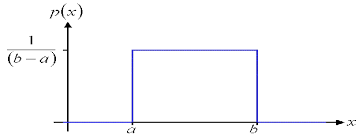 "Continuous Uniform Distribution pdf")

Since the area under the curve is equal to 1, and its shape is a <strong>rectangle</strong>, we can simply calculate f(x)

$$ Area = base * height $$ where:
$$ Area = 1 $$
$$ base = b - a $$
$$ height = f(x) $$

$$ (b - a) f(x) = 1 $$ 
$$ f(x) = 
\begin{cases}
\frac{1}{b - a}, & for \enspace a \leq x \leq b \\
0, & for \enspace x \lt a \ and \ x \gt b
\end{cases}$$


The <strong>median</strong> (m):
$$ m = \frac{b - a}{2} $$

The <strong>mean</strong> ($ \mu $) is also:
$$ \mu = \frac{b - a}{2} $$

The <strong>variance</strong> ($ \sigma^{2} $):
$$ \sigma^{2} = \frac{1}{12}(b - a)^{2} $$

<strong>Example. 1</strong> Suppose X is a random variable that has a uniform distribution in the interval [200; 250]. What is f(x)?

$$ f(x) = \frac{1}{(b - a)} = \frac{1}{(250 - 200)} = 0.02 $$

In [199]:
# Define the uniform distribution
def plot_uniform_dist(left, right):
    ax = plt.gca()
    
    dist_range = right - left
    uniform_dist = uniform(left, dist_range)

    uniform_x = np.linspace(left, right, num=1000)
    uniform_x_probabilities = uniform_dist.pdf(uniform_x)
    
    verts = [(left, 0)] + list(zip(uniform_x, uniform_x_probabilities)) + [(right, 0)]
    polygon = Polygon(verts, color='green')
    ax.add_patch(polygon)
   
    # Plot the distribution
    plt.plot(uniform_x, uniform_x_probabilities, color='green')
    
    # Set y limits: min - 0 since negative probabilities are not possible
    # and ymax to be 150% of the uniform probability (for visual purposes)
    plt.ylim(ymin=0, ymax=1.5 * uniform_dist.pdf(left))
    plt.show()

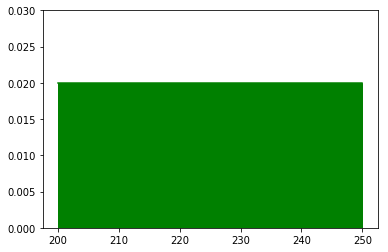

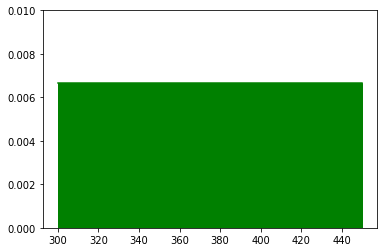

In [200]:
plot_uniform_dist(200, 250)
plot_uniform_dist(300, 450)

## Normal Distribution (a.k.a. Gaussian Distribution)

The <strong>probability density function</strong> (pdf) is equal to:

$$ f(x) = \frac{1}{\sqrt{2\pi}\sigma} e ^{-\frac{1}{2\sigma^{2}}(x - \mu)^2}, \ for \ -\infty \lt x \lt \infty$$

The grafical representation is also called a 'bell curve'
![alt text](http://www.muelaner.com/wp-content/uploads/2013/07/Standard_deviation_diagram.png "Graphical representation of a normal distribution")

The mean ($ \mu $) is also the mode and the median of the distribution. It's also the <strong>maximum value</strong> of the density function:
$$ f(x)_{max} = \frac{1}{\sigma\sqrt{2\pi}} $$

Standart deviation ($ \sigma $)
Variance ($ \sigma^{2} $)

It's defined by a mean and variance ($ X \sim (\mu, \sigma^{2})$)

Properties:
1. <strong>The distribution is symmetric about the mean ($ \mu $).</strong>
2. Two inflection points of the curve occur where x is on distance $ x \pm \sigma $.
3. The area under the curve in the interval $ AUC[\mu - \sigma; \mu + \sigma] = 0.6827 $  $ AUC [\mu - 2\sigma; \mu + 2\sigma] = 0. 9545 $ and $ AUC [\mu - 3\sigma; \mu + 3\sigma] = 0. 9973 $ 

<strong>Example. 1</strong> Normally distributed test result with mean = 105 and variance = 16. ($ X \sim (105, 60)$). What is the probability density of a random sampled student to have:
1. Less than 100 points
2. More than 112 points
3. Between 106 and 109 points

In [203]:
def plot_normal_distribution(mean, std, min_value=-np.inf, max_value=np.inf):
    min_plot_boundary = mean - 4 * standard_deviation
    max_plot_boundary = mean + 4 * standard_deviation
    
    ax = plt.gca()
    
    # Define the normal distribution
    norm_dist = norm(mean, std)   
    norm_x = np.linspace(min_plot_boundary, max_plot_boundary, num=1000)
    norm_x_probabilities = norm_dist.pdf(norm_x)
    
    # Plot the probability density function of normal distribution (f(x))
    plt.plot(norm_x, norm_x_probabilities, color='darkgreen')
    
    # Calculate AUC for the desired interval X ~ [min_value, max_value]
    auc = norm_dist.cdf(max_value) - norm_dist.cdf(min_value)
    
    # Plot the polygon nder the line and calculate the pdf for it
    if (not min_value) or (min_value < min_plot_boundary):
        min_value = min_plot_boundary
    elif min_value > max_plot_boundary:
        min_value = max_plot_boundary
        
    if (not max_value) or (max_value > max_plot_boundary):
        max_value = max_plot_boundary    
    elif max_value < min_plot_boundary:
        max_value = min_plot_boundary
        
    norm_interval = np.linspace(min_value, max_value)
    norm_interval_probabilities = norm_dist.pdf(norm_interval)
    verts = [(min_value, 0)] + list(zip(norm_interval, norm_interval_probabilities)) + [(max_value, 0)]
    polygon = Polygon(verts, color='darkorange')
    ax.add_patch(polygon)
    
    # Display the AUC
    plt.text(x=(min_value + max_value) / 2, 
             y=norm_dist.pdf(mean) / 3, 
             s='{0:.4f}'.format(auc),
             horizontalalignment='center',
             fontsize=20)
    
    # Plot the mean
    mean_x = np.full((1000, 1), mean)
    mean_y = np.linspace(0, norm_dist.pdf(mean), num=1000)
    plt.plot(mean_x, mean_y, color='darkgreen', linestyle='--')
    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.set_xticks([mean, min_value, max_value])
    ax.set_yticks([])
    plt.title('Probability density function of normal distribution')
    plt.ylim(ymin=0)
    
    plt.show()

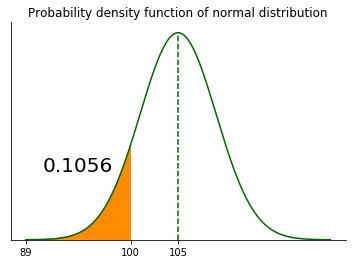

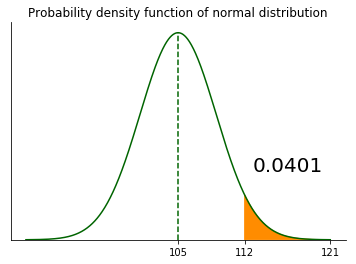

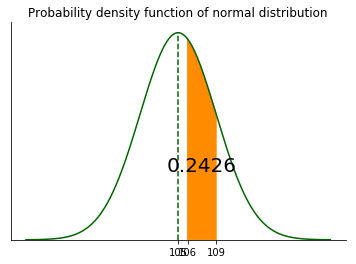

In [204]:
# Define the normal distribution
plot_normal_distribution(mean=105, std=np.sqrt(16), max_value=100)
plot_normal_distribution(mean=105, std=np.sqrt(16), min_value=112)
plot_normal_distribution(mean=105, std=np.sqrt(16), min_value=106, max_value=109)

## Standard Normal Distribution

Standard normal distribution is a normal distribution with mean = 0 and variance = 1 ($ X \sim (0, 1)$)

![alt text](https://www.mathsisfun.com/data/images/normal-distrubution-large.svg "Graphical representation of a standard normal distribution")

The linear transformation to convert any normal distribution to standard normal one is:

$$  z = \frac{x - \mu}{\sigma} $$

<strong>Example. 1</strong> Suppose the height of adult American males is approximately normally distributed with a mean of 176.3 centimetres and a standard deviation of 7.1 centimetres. 
* What is the probability a randomly selected adult male to be taller than 180 sm?

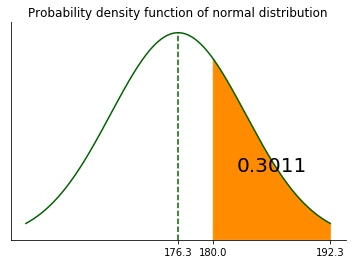

In [180]:
plot_normal_distribution(176.3, 7.1, min_value=180)

## Multivariate Normal Distribution

## Chi-squared ($ \chi^{2} $) Distribution

The chi-squared distribution is related to the standard normal distribution. 

If a random variable $ Z $ has a standard normal distribution, therefore $Z^{2}$ has a $\chi^{2} $ distribution with one degree of freedom.

## Student's (t) Distribution

It's strongly related to the normal distribution.

## Fisher (F) Distribution